In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

In [2]:
df=pd.read_excel('nort_west_plains.xlsx')

In [3]:
df.head()

Region      Area            Timely sown        Seed  \
0  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  WH1105 (C)   
1  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  DBW187 (C)   
2  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  DBW222 (C)   
3  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  HD2967 (C)   
4  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  HD3086 (C)   

   Grain appearance  Hectolitre weight  Protein content  Sedimentation value  \
0               5.0               76.6             11.5                 60.0   
1               5.6               79.8             11.6                 52.7   
2               5.4               78.7             12.1                 54.2   
3               5.0               74.4             11.7                 47.7   
4               5.2               76.0             13.2                 55.4   

   Phenol test  Fe content  Zn content  
0          7.0        33.8        25.4  
1          5.5        39.4        28.3  
2          5.5        32.3        29.1  
3          7.5        32.7        26.2  
4          6.5        37.4        36.0

In [4]:
df.isnull().sum()

Region                 0
Area                   0
Timely sown            0
Seed                   0
Grain appearance       0
Hectolitre weight      0
Protein content        0
Sedimentation value    0
Phenol test            0
Fe content             0
Zn content             0
dtype: int64

In [5]:
df.shape

(180, 11)

In [6]:
df.iloc[:,9:11]

Fe content  Zn content
0          33.8        25.4
1          39.4        28.3
2          32.3        29.1
3          32.7        26.2
4          37.4        36.0
..          ...         ...
175        44.8        37.2
176        44.8        36.6
177        42.8        32.2
178        39.5        30.2
179        42.4        46.7

[180 rows x 2 columns]

In [7]:
dataframe=pd.DataFrame(df.iloc[:,9:])

In [8]:
dataframe.head()

Fe content  Zn content
0        33.8        25.4
1        39.4        28.3
2        32.3        29.1
3        32.7        26.2
4        37.4        36.0

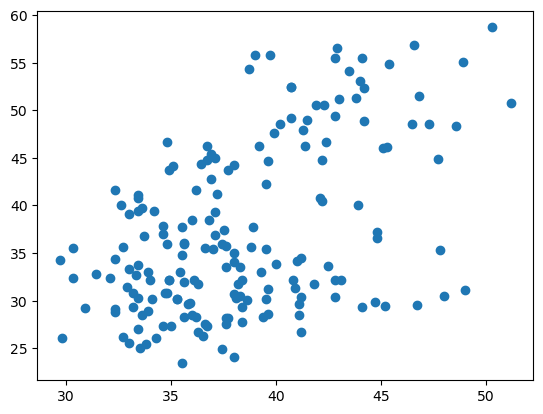

In [9]:
plt.scatter(dataframe['Fe content'],dataframe['Zn content'])
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:
k_rng = range(1,14)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataframe[['Fe content','Zn content']])
    sse.append( km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

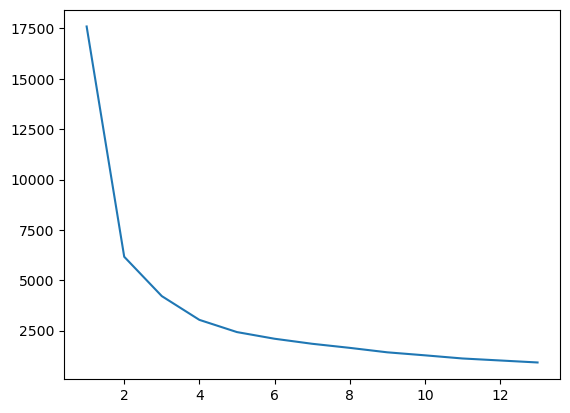

In [12]:
plt.plot(k_rng,sse)

In [13]:
kvalue=range(2,12)
sil=[]
for k in kvalue:
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(dataframe[['Fe content','Zn content']])
    score=metrics.silhouette_score(dataframe[['Fe content','Zn content']], labels)
    sil.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

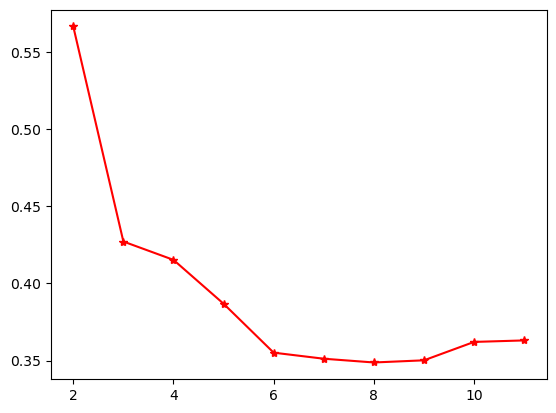

In [14]:
plt.plot(kvalue,sil,marker='*',color='red')
plt.show()

In [15]:
km = KMeans(n_clusters=2)
c = km.fit_predict(dataframe)
c

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0])

In [16]:
dataframe['cluster'] = c
dataframe.head()

Fe content  Zn content  cluster
0        33.8        25.4        1
1        39.4        28.3        1
2        32.3        29.1        1
3        32.7        26.2        1
4        37.4        36.0        1

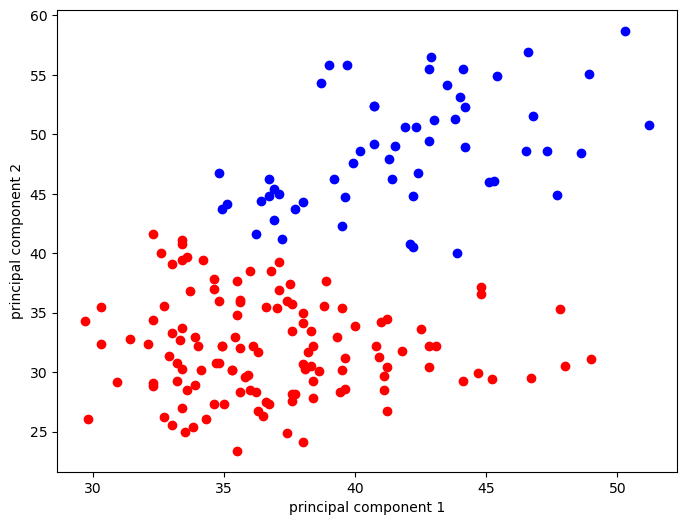

In [17]:
plt.figure(figsize=(8,6))
dfc1 = dataframe[dataframe.cluster==0]
dfc2 = dataframe[dataframe.cluster==1]
plt.scatter(dfc1['Fe content'],dfc1['Zn content'],color='blue')
plt.scatter(dfc2['Fe content'],dfc2['Zn content'],color='red')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [18]:
df['cluster'] = c
df.head()

Region      Area            Timely sown        Seed  \
0  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  WH1105 (C)   
1  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  DBW187 (C)   
2  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  DBW222 (C)   
3  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  HD2967 (C)   
4  North West Plains Zone (NWPZ)  Ludhiana  Irrigated Timely Sown  HD3086 (C)   

   Grain appearance  Hectolitre weight  Protein content  Sedimentation value  \
0               5.0               76.6             11.5                 60.0   
1               5.6               79.8             11.6                 52.7   
2               5.4               78.7             12.1                 54.2   
3               5.0               74.4             11.7                 47.7   
4               5.2               76.0             13.2                 55.4   

   Phenol test  Fe content  Zn content  cluster  
0          7.0        33.8        25.4        1  
1          5.5        39.4        28.3        1  
2          5.5        32.3        29.1        1  
3          7.5        32.7        26.2        1  
4          6.5        37.4        36.0        1

In [19]:
import numpy as np

In [20]:
mean_val=np.mean(dfc1)
mean_val

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Fe content    41.762500
Zn content    48.546429
cluster        0.000000
dtype: float64

In [21]:
mean_val=np.mean(dfc2)
mean_val

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Fe content    36.833871
Zn content    32.050806
cluster        1.000000
dtype: float64

In [22]:
df.to_csv('N_west_P_without_scaler_cluster.csv')

In [23]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(dfc1['Fe content'])

standard_deviation


3.992652291576186

In [24]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(dfc1['Zn content'])

standard_deviation


4.777213932741935

In [25]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(dfc2['Fe content'])

standard_deviation


3.951498023346585

In [26]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(dfc2['Zn content'])

standard_deviation


4.073389172376707